<a href="https://colab.research.google.com/github/Achillean-1/Speech-Classification/blob/main/Speech_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import cv2

import os
import glob

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
spektogram, labels = [],[]

folders = ['OAF_Sad', 'OAF_happy', 'OAF_angry']

In [ ]:
for folder in folders:
   for spc in glob.glob('/content/drive/MyDrive/bahantugas_dataset-20230402T101947Z-001/bahantugas_dataset/'+folder+'/*.wav'):
     y, sr = librosa.load(spc)
     spec = np.abs(librosa.stft(y))
     spec = librosa.amplitude_to_db(spec, ref=np.max)
     spec = cv2.resize(spec,(64,64))
     spec = spec.flatten()
     spektogram.append(spec)
     labels.append(folder)

data = pd.DataFrame(spektogram)
data['Label'] = labels
data.to_csv('/content/drive/MyDrive/data/Speech_Classification.csv', index=False)

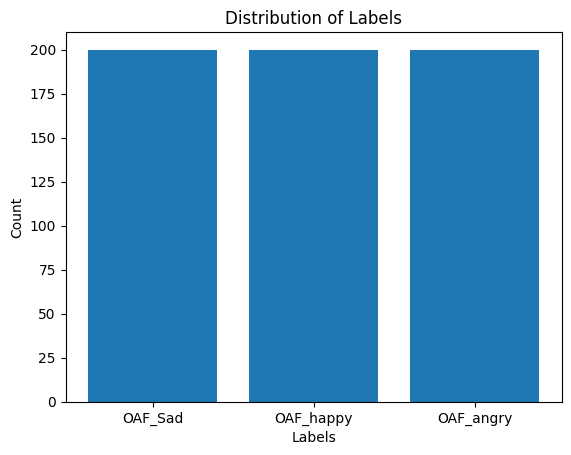

In [ ]:
# count the number of instances for each label
label_counts = data['Label'].value_counts()

# create a bar chart
plt.bar(label_counts.index, label_counts.values)

# set the title and axis labels
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')

# display the plot
plt.show()

In [ ]:
y = data['Label'].values
le = LabelEncoder()
Y = le.fit_transform(y)
Y = to_categorical(Y, 3)

X = data.drop(columns=['Label'])
X = X.values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(2048, input_dim=4096, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 2048)              8390656   
                                                                 
 dense_15 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 3)                

In [ ]:
#prediksi dan evaluasi
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25)

Epoch 1/25
14/14 [==============================] - 3s 148ms/step - loss: 263.3636 - accuracy: 0.3333 - val_loss: 163.3283 - val_accuracy: 0.3222
Epoch 2/25
14/14 [==============================] - 2s 138ms/step - loss: 93.2686 - accuracy: 0.3238 - val_loss: 37.2299 - val_accuracy: 0.3833
Epoch 3/25
14/14 [==============================] - 2s 134ms/step - loss: 59.1313 - accuracy: 0.3905 - val_loss: 53.3607 - val_accuracy: 0.2944
Epoch 4/25
14/14 [==============================] - 2s 138ms/step - loss: 15.1051 - accuracy: 0.3548 - val_loss: 3.5203 - val_accuracy: 0.3222
Epoch 5/25
14/14 [==============================] - 2s 165ms/step - loss: 3.2027 - accuracy: 0.3619 - val_loss: 1.9840 - val_accuracy: 0.2944
Epoch 6/25
14/14 [==============================] - 3s 188ms/step - loss: 1.6626 - accuracy: 0.3476 - val_loss: 0.8994 - val_accuracy: 0.6889
Epoch 7/25
14/14 [==============================] - 2s 134ms/step - loss: 0.9491 - accuracy: 0.4762 - val_loss: 1.9420 - val_accuracy: 0.29

In [ ]:
y_prediksi = model.predict(X_test)
y_prediksi_labels = np.argmax(y_prediksi, axis=1)
y_true = [np.argmax(x) for x in y_test]

from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_prediksi_labels)


6/6 [==============================] - 0s 18ms/step


0.6444444444444445

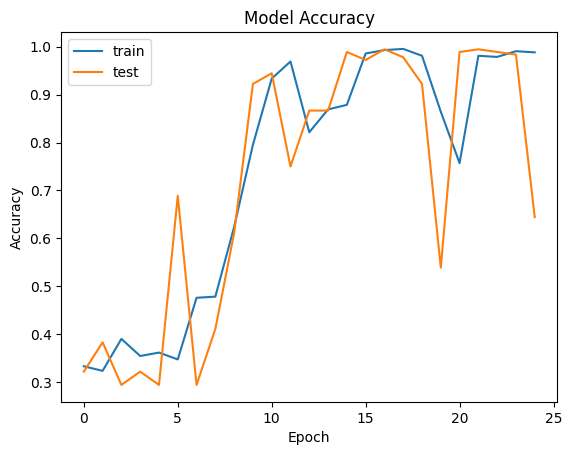

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()